In [2]:
library(repr)
library(tidyverse)
library(tidymodels)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

# Title: Factors for Heart Disease Proposal

### Introduction:

There are many different kinds of factors that contribute to different kinds of heart disease. These factors include symptoms, sex, and age. Symptoms can include chest pains, fbs, cholestorel, etc. The question that we will be analyzing and trying to answer is: what is the diagnosis of heart disease based off of these predictors? The data set we will be using to complete our project is a data set of heart disease, and it includes patients, and the symptoms that they have relative to heart disease. It includes the patients age, sex, and different symptoms.


In [3]:
set.seed(9999) # set a seed to be consistent

heart_data <- read_excel("data/heart_disease.xlsx") |>
                        mutate(age = as.integer(age), sex = as.integer(sex), 
                               cp = as.integer(cp), trestbps = as.integer(trestbps), 
                               chol = as.integer(chol), fbs = as.integer(fbs), restecg = as.integer(restecg),
                               thalach = as.integer(thalach), exang = as.integer(exang),
                               slope = as.integer(slope), ca = as.integer(ca), 
                               thal = as.integer(thal), num = as.factor(num)) |>
                        na.omit() # Omit any missing values
                    

# Split data (training 70% test 30%)
heart_split <- initial_split(heart_data, prop = 0.70, strata = num)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

# Cross-Validation
heart_vfold <- vfold_cv(heart_train, v = 5, strata = num)

heart_train

Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `ca = as.integer(ca)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
54,1,4,140,239,0,0,160,0,1.2,1,0,3,0
48,0,3,130,275,0,0,139,0,0.2,1,0,3,0
49,1,2,130,266,0,0,171,0,0.6,1,0,3,0
58,0,1,150,283,1,2,162,0,1.0,1,0,3,0


In [4]:
# KNN Steps
k_vals <- tibble(neighbors = c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)) # K-Values you want to test out

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

heart_recipe <- recipe(num ~ . , data = heart_train) |>
                    step_scale(all_predictors()) |>
                    step_center(all_predictors())


heart_fit <- workflow() |>
                     add_recipe(heart_recipe) |>
                     add_model(knn_spec) |>
                     tune_grid(resamples = heart_vfold, grid = k_vals)

heart_results <- collect_metrics(heart_fit)
heart_results
accuracies <- heart_results |>
              filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.5102014,5,0.02352620,Preprocessor1_Model01
2,roc_auc,hand_till,0.6049857,5,0.02387060,Preprocessor1_Model01
3,accuracy,multiclass,0.5686500,5,0.02412569,Preprocessor1_Model02
3,roc_auc,hand_till,0.6127326,5,0.02061048,Preprocessor1_Model02
4,accuracy,multiclass,0.5929353,5,0.02303498,Preprocessor1_Model03
4,roc_auc,hand_till,0.6410063,5,0.01090615,Preprocessor1_Model03
5,accuracy,multiclass,0.5930573,5,0.02615724,Preprocessor1_Model04
5,roc_auc,hand_till,0.6493829,5,0.01369872,Preprocessor1_Model04
6,accuracy,multiclass,0.5932842,5,0.03210237,Preprocessor1_Model05


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2,accuracy,multiclass,0.5102014,5,0.02352620,Preprocessor1_Model01
3,accuracy,multiclass,0.5686500,5,0.02412569,Preprocessor1_Model02
4,accuracy,multiclass,0.5929353,5,0.02303498,Preprocessor1_Model03
5,accuracy,multiclass,0.5930573,5,0.02615724,Preprocessor1_Model04
6,accuracy,multiclass,0.5932842,5,0.03210237,Preprocessor1_Model05
7,accuracy,multiclass,0.5739989,5,0.02966259,Preprocessor1_Model06
8,accuracy,multiclass,0.5736500,5,0.02489803,Preprocessor1_Model07
9,accuracy,multiclass,0.5831792,5,0.02060977,Preprocessor1_Model08
10,accuracy,multiclass,0.5831792,5,0.01911214,Preprocessor1_Model09


In [1]:
cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors (k)", y = "Accuracy Estimate") +
       theme(text = element_text(size = 20)) 
       # scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
       # scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
cross_val_plot
# K = 10 is the best K - value

ERROR: Error in ggplot(accuracies, aes(x = neighbors, y = mean)): could not find function "ggplot"


In [ ]:
# Build model specifications with the best k value
knn_spec_final <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) |>
                  set_engine("kknn") |>
                  set_mode("classification")

final_fit <- workflow() |>
            add_recipe(heart_recipe) |>
            add_model(knn_spec_final) |>
            fit(data = heart_test)
final_fit

In [ ]:
heart_predictions <- predict(final_fit, heart_test) |>
                     bind_cols(heart_test)

heart_metrics <- heart_predictions |>
                 metrics(truth = num, estimate = .pred_class)

heart_conf_mat <- heart_predictions |>
                 conf_mat(truth = num, estimate = .pred_class)

heart_metrics
heart_conf_mat

# Methods
### 1. Understanding the dataset
#### By exploring the dataset, we were able to detect missing values & inconsistent data type. 

We used na.omit() in order to exclude any observations that had missing values.
We made our data type consistent by changing data type into integer, double, or character using as.integer(), as.numeric(), and as.factor() functions. 

### 2. Selecting relevant variable.
By exploring each column, we derived to a conclusion that each one of variable/column are relevanat and useful in predicting diagnosis of heart disease. One way of visualizing this is by graphing a histogram for each one of the columns.

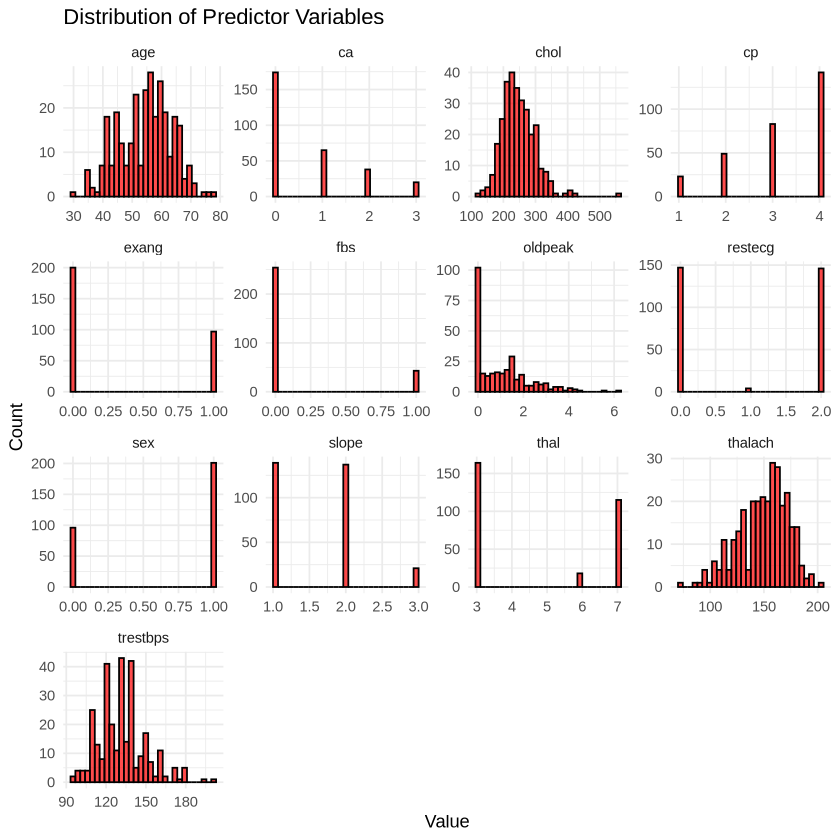

In [4]:
# Graphing histogram for each one of the columns
heart_data_long <- heart_data |>
  pivot_longer(cols = -num, names_to = "Predictor", values_to = "Value")

heart_data_long |>
ggplot(aes(x = Value)) +
  geom_histogram(bins = 30, fill = "red", color = "black", alpha = 0.7) +
  facet_wrap(~ Predictor, scales = "free") +
  labs(title = "Distribution of Predictor Variables",
       x = "Value", 
       y = "Count") +
      theme_minimal()

### 2. Selecting relevant variable (Continued).
From the following histograms, we can observe that age, chol, thalach, and trestbps is bell shaped (unimodal), symmetrical about the mean, therefore follows a normal distribution. This tells us that the mentioned columns are very accurate and easy to work with. Since variables/columns other than age, chol, thalach, and trestbps are restricted integer values (Their values are only from 0 to 3 or from 1 to 4 and so on...), we can be sure that they are accurate.

Now that we've confirmed all variables are accurate and relevant to the diagnosis of heart disease, we will be using all variables/columns for classifier.